d:\Users\jg255\anaconda3\envs\ray310\lib\site-packages\scipy\optimize\_trustregion_constr\projections.py:181: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  warn('Singular Jacobian matrix. Using SVD decomposition to ' +
d:\Users\jg255\anaconda3\envs\ray310\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


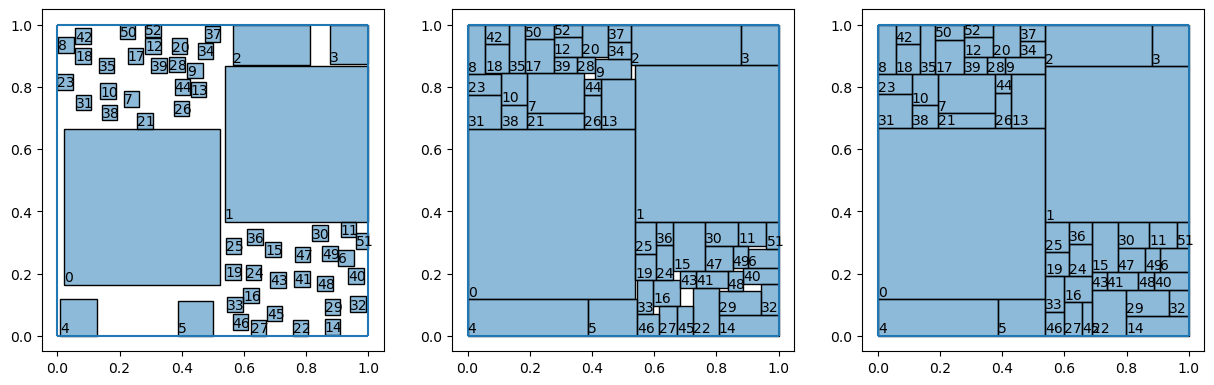

In [12]:
from SquareDivision.src.rectangle_class import Rectangulation

rects = Rectangulation(config={'seed' : 1000000000000001})#123456})
rects.execute(num=500)
rects.prepare_constraints()
rects.close_holes()
rects.draw_closed()

In [9]:
rects.holes_idxs

[[[0, 57], [48, 21]],
 [[7, 58], [9, 54]],
 [[38, 39], [23, 7]],
 [[39, 59], [22, 32]],
 [[33, 27], [21, 46]],
 [[27, 38], [53, 43]],
 [[53, 31], [17, 23]],
 [[16, 43], [46, 45]],
 [[29, 2], [1, 55]],
 [[15, 4], [26, 10]],
 [[19, 15], [8, 28]],
 [[30, 8], [50, 19]],
 [[15, 34], [10, 25]],
 [[34, 29], [56, 49]],
 [[20, 49], [25, 60]]]

#### Maybe x0 from the graph ?

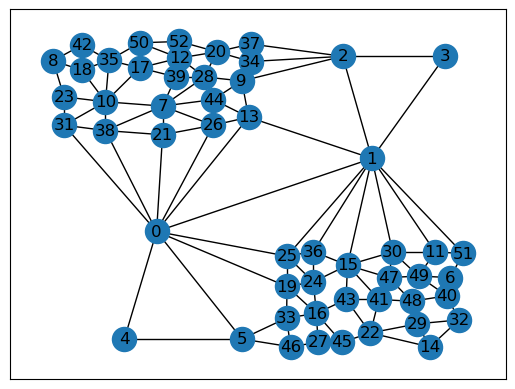

In [13]:
import networkx as nx
G = nx.from_numpy_array(rects.east_neighbours + rects.north_neighbours)
attrs = { i : {'pos': tuple(row[:2] + 0.5 * row[2:4])} for i, row in enumerate(rects.clinched_rectangles)}
nx.set_node_attributes(G, attrs)
pos = nx.get_node_attributes(G,'pos')
nx.draw_networkx(G,pos=pos)

In [3]:
import numpy as np
pts_diag = np.array(
                 [[0.25, 0.25],
                  [0.75, 0.75]])
def tepui(
        base:float=0.05,
        top:float=0.3,
        slope:float=4,
        vertex:float=1,
        pts:np.ndarray=pts_diag
):
    return lambda pt : np.minimum(top, np.maximum(base, vertex - slope * np.min(np.linalg.norm(pts - pt, axis=1))))

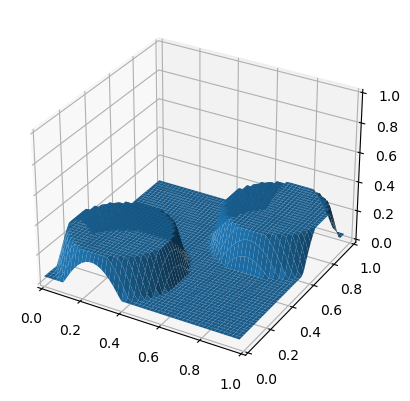

In [6]:
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

tepui_at = tepui(
        base=0.05,
        top=0.3,
        slope=5,
        vertex=1.5,
)

x = np.arange(0, 1, 0.02)
y = np.arange(0, 1, 0.02)

X, Y = np.meshgrid(x, y)
points = np.array([X,Y])

nu = np.apply_along_axis(tepui_at, 0, points)

fig = plt.figure()
ax:Axes = fig.add_subplot(projection='3d')
ax.axes.set_xlim3d(left=0, right=1) 
ax.axes.set_ylim3d(bottom=0, top=1) 
ax.axes.set_zlim3d(bottom=0, top=1) 
ax.plot_surface(X, Y, nu)
plt.show()

In [8]:
from SquareDivision.src.generators import uniform_pts
random_points = uniform_pts(n=5)
vals = np.apply_along_axis(tepui_at, 1, random_points)
vals
# rng = np.random.default_rng(1234)
# rng.uniform([xmin, ymin], [xmax, ymax], size=(n, 2))

array([0.4       , 0.05      , 0.05      , 0.05      , 0.36100765])

In [24]:
import numpy as np
norma_a = np.array([[1, 1],[2, 3],[4, 5],[6, 7]]).astype(float)
a=np.ones(shape=(2,2))
# recip_a = np.reciprocal(a)
# np.diagonal(norma_a.T.dot(recip_a)).sum()
# (recip_a**2)*norma_a
# norma_a[:,0] * norma_a[:,1]
type(a[1,1])

numpy.float64

In [32]:
li = [[3, 5],[2,7]]
((left, right), [down, up]) = li

In [52]:
((left, right), (down, up)) = [[1, 30], [27, 39]]
mid_pts = rects.clinched_rectangles[:,:2] + 0.5 * rects.clinched_rectangles[:,2:4]
X_lb = rects.clinched_rectangles[left, 0] + rects.clinched_rectangles[left, 2]
X_ub = rects.clinched_rectangles[right, 0]
Y_lb = rects.clinched_rectangles[down, 1] + rects.clinched_rectangles[down, 3]
Y_ub = rects.clinched_rectangles[up, 1]
# np.where(X_lb < mid_pts[0])#< X_ub)# and np.where(Y_lb<mid_pts[1]<Y_ub)
((X_lb < mid_pts[:,0])* ( mid_pts[:,0] < X_ub) * (Y_lb < mid_pts[:,1]) * (mid_pts[:,1] < Y_ub)).sum()
# mid_pts[:,0]< X_ub

1